Predicting loan defaults is an important task for lenders, helping them manage risk and make better decisions. A good model can spot borrowers who might struggle to repay, allowing financial institutions to step in early. This analysis looks at how well the model predicts defaults, aiming for the right balance—avoiding too many false alarms while still catching real risks.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\hp\Documents\Datasets\LGR\loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(45000, 14)

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [9]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [10]:
df = df[df['person_age'] < 101]

In [11]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [12]:
# Identifying categorical and numerical columns
cat_cols = df.select_dtypes('object')
num_cols = df.select_dtypes('number')
print(f"shape of koan dataframe is {df.shape}")
print(f"shape of categorical dataframe is {cat_cols.shape}")
print(f"shape of numerical dataframe is {num_cols.shape}")

shape of koan dataframe is (44993, 14)
shape of categorical dataframe is (44993, 5)
shape of numerical dataframe is (44993, 9)


In [13]:
cat_cols.head()

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
0,female,Master,RENT,PERSONAL,No
1,female,High School,OWN,EDUCATION,Yes
2,female,High School,MORTGAGE,MEDICAL,No
3,female,Bachelor,RENT,MEDICAL,No
4,male,Master,RENT,MEDICAL,No


In [14]:
cat_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44993 entries, 0 to 44999
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   person_gender                   44993 non-null  object
 1   person_education                44993 non-null  object
 2   person_home_ownership           44993 non-null  object
 3   loan_intent                     44993 non-null  object
 4   previous_loan_defaults_on_file  44993 non-null  object
dtypes: object(5)
memory usage: 2.1+ MB


In [15]:
num_cols.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1


In [16]:
num_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44993 entries, 0 to 44999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  44993 non-null  float64
 1   person_income               44993 non-null  float64
 2   person_emp_exp              44993 non-null  int64  
 3   loan_amnt                   44993 non-null  float64
 4   loan_int_rate               44993 non-null  float64
 5   loan_percent_income         44993 non-null  float64
 6   cb_person_cred_hist_length  44993 non-null  float64
 7   credit_score                44993 non-null  int64  
 8   loan_status                 44993 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 3.4 MB


In [17]:
# Checking uniqueness of categorical columns
uniqueness_cols = cat_cols.nunique()
print(uniqueness_cols)

person_gender                     2
person_education                  5
person_home_ownership             4
loan_intent                       6
previous_loan_defaults_on_file    2
dtype: int64


In [18]:
import warnings
warnings.filterwarnings("ignore")

Univariate Analysis

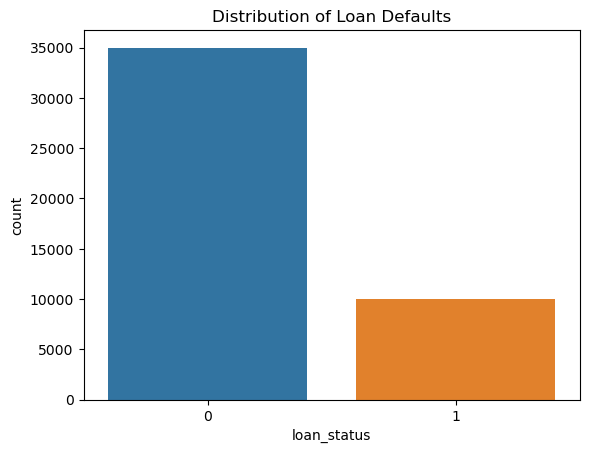

In [20]:
sns.countplot(x='loan_status', data = num_cols)
plt.title('Distribution of Loan Defaults')
plt.show()

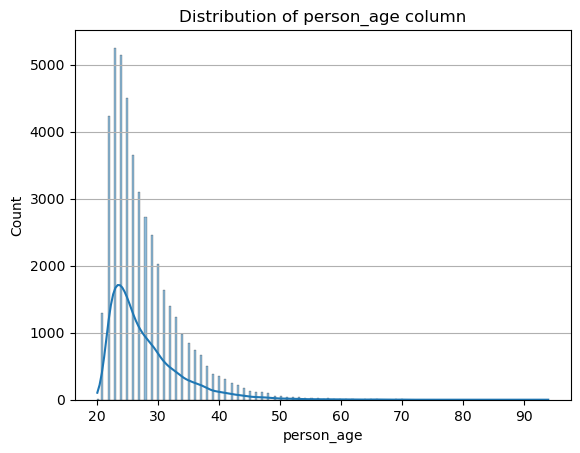

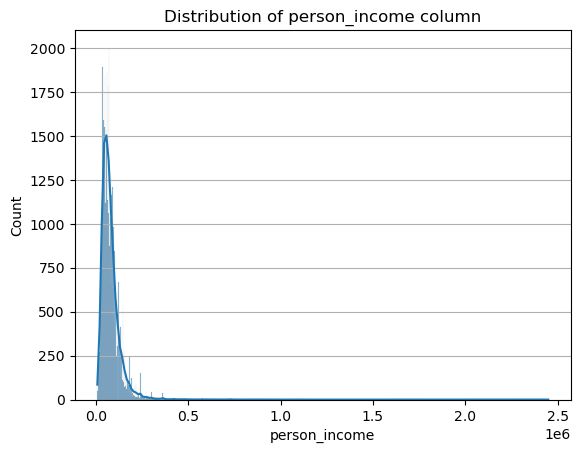

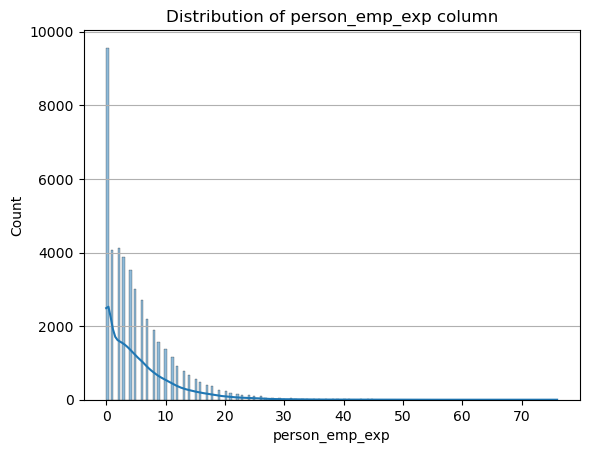

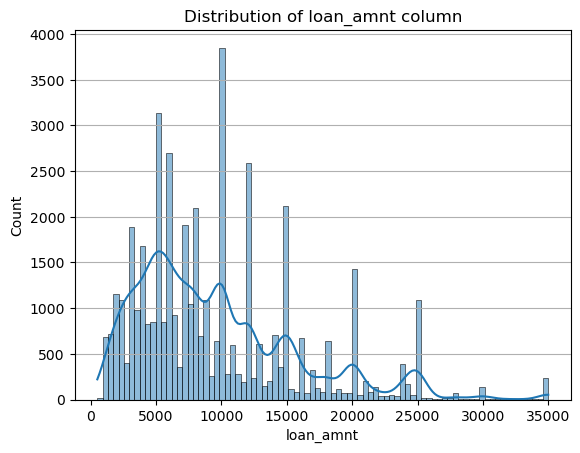

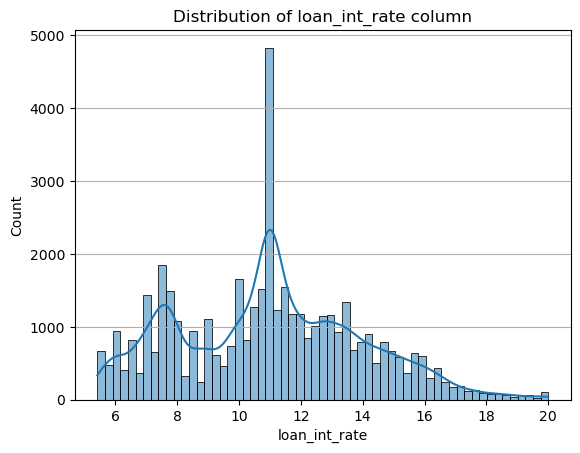

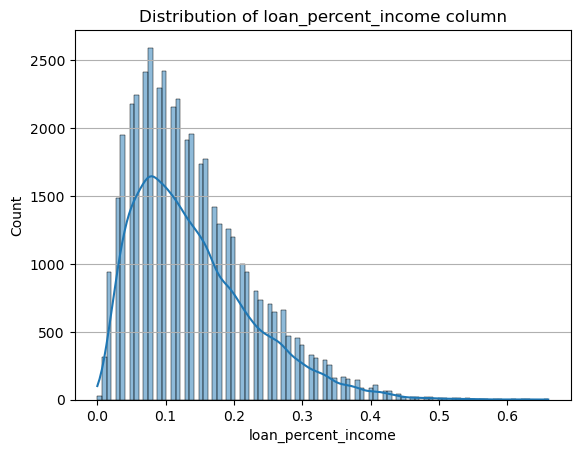

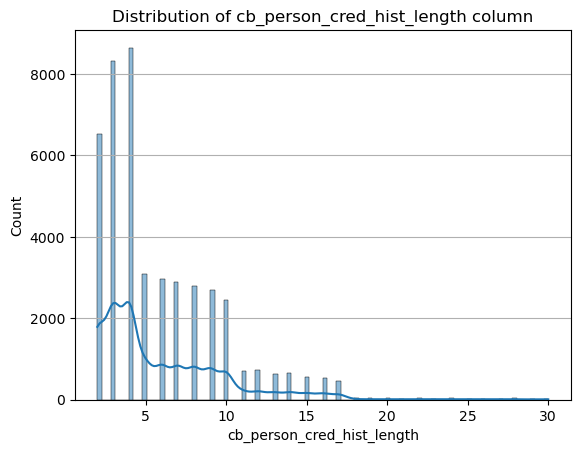

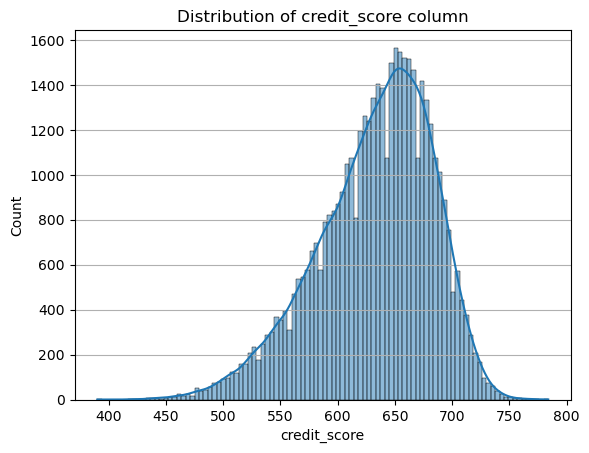

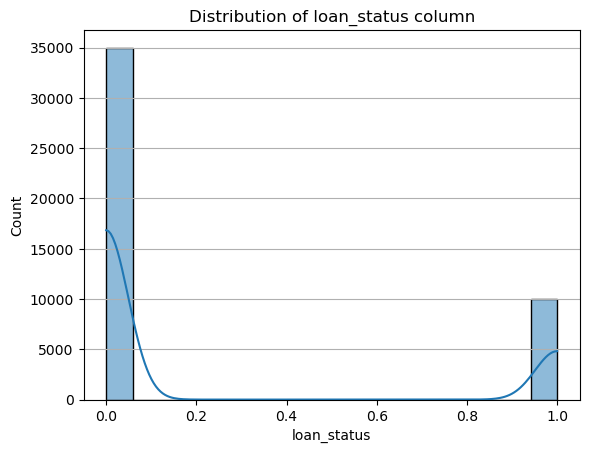

In [21]:
# Univariate Analysis for numerical columns
for column in num_cols.columns:
    sns.histplot(num_cols[column],kde=True)
    plt.title(f"Distribution of {column} column")
    plt.grid(axis='y')
    plt.show()

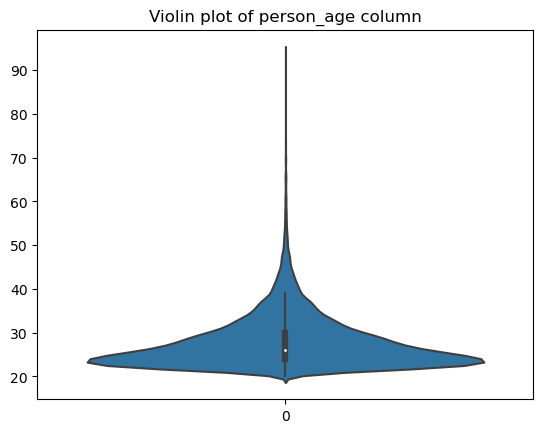

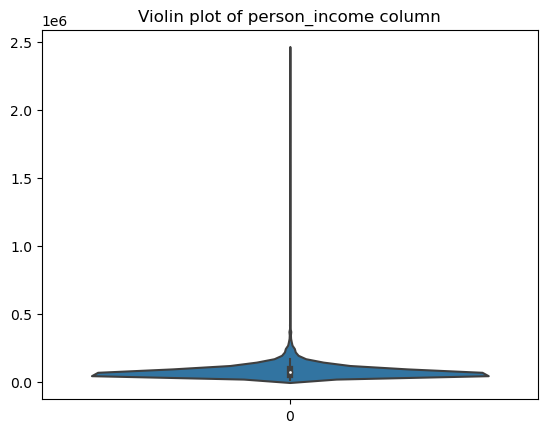

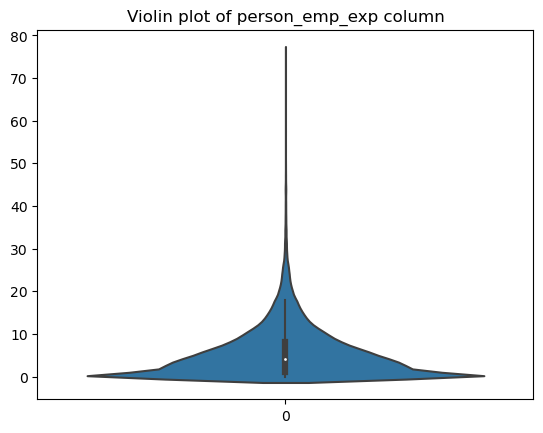

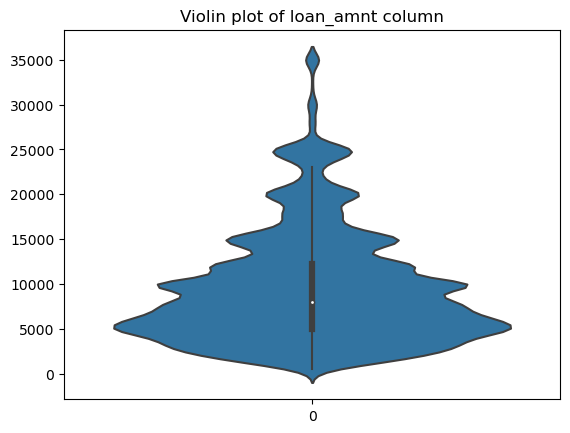

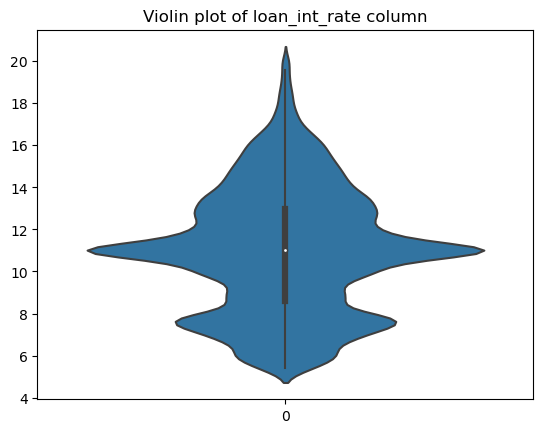

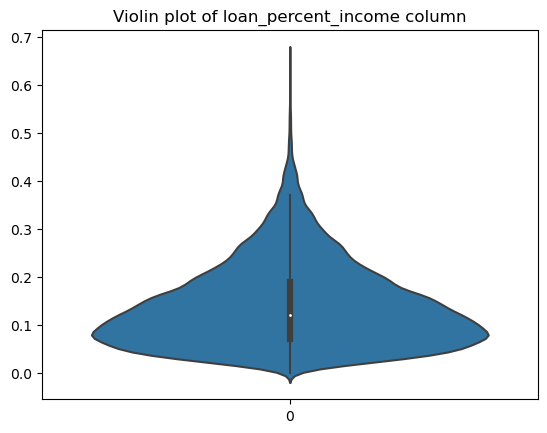

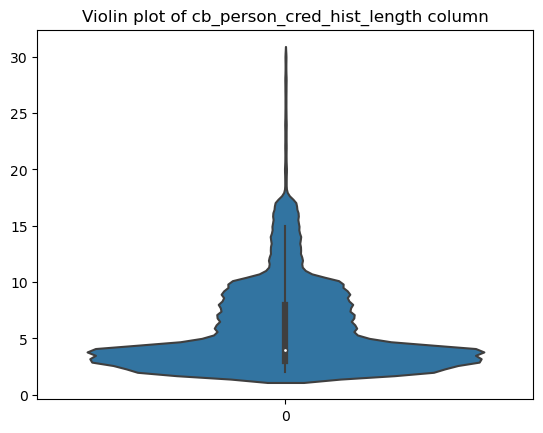

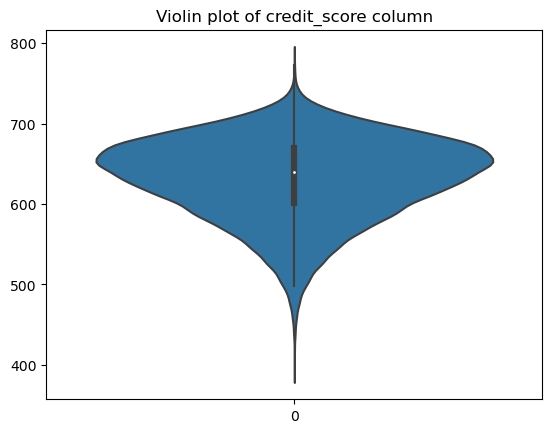

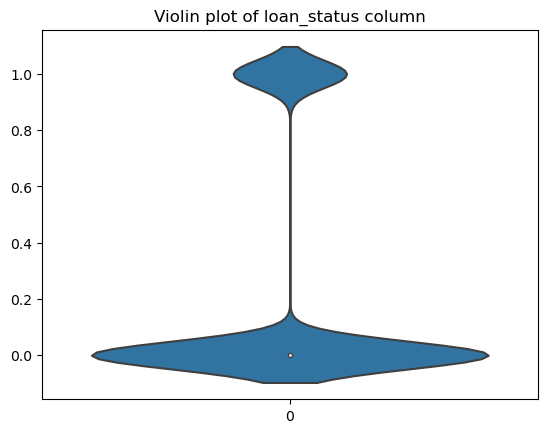

In [22]:
for column in num_cols.columns:
    sns.violinplot(num_cols[column])
    plt.title(f"Violin plot of {column} column")
    plt.show()

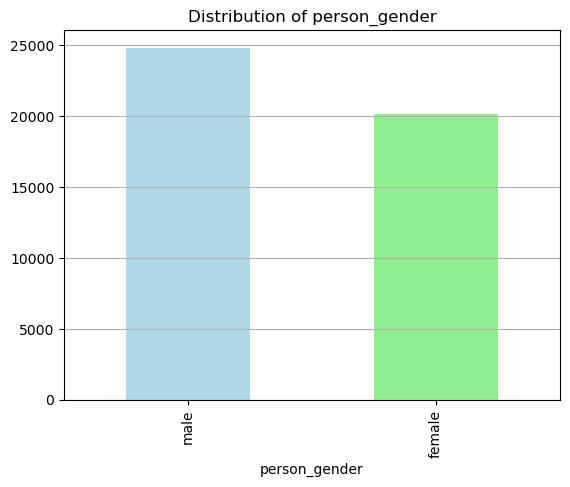

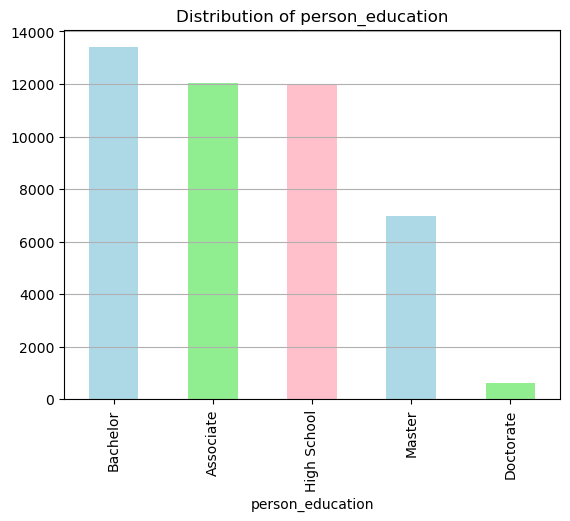

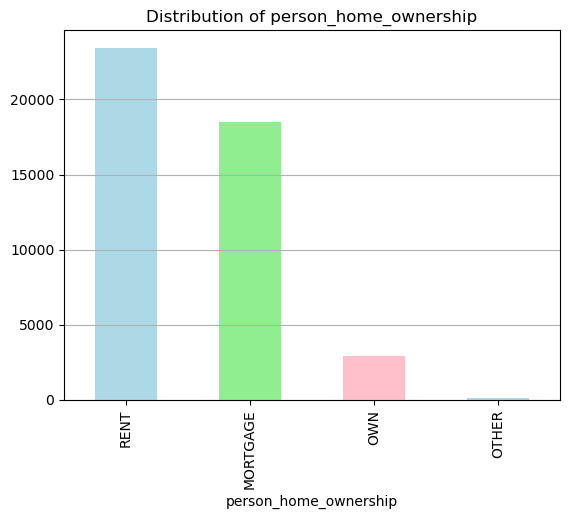

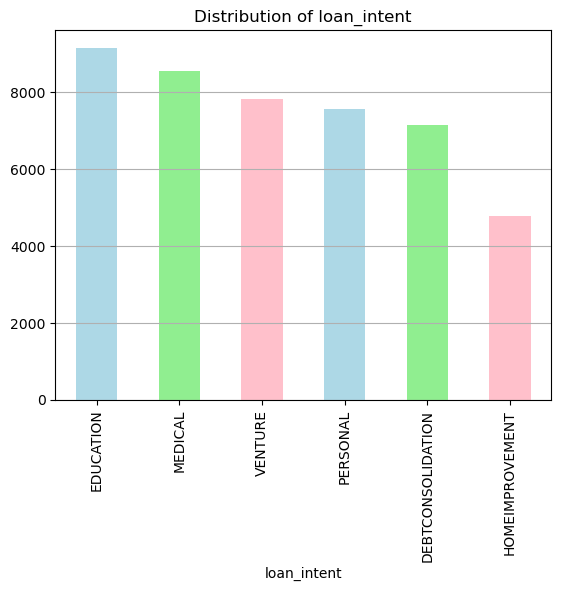

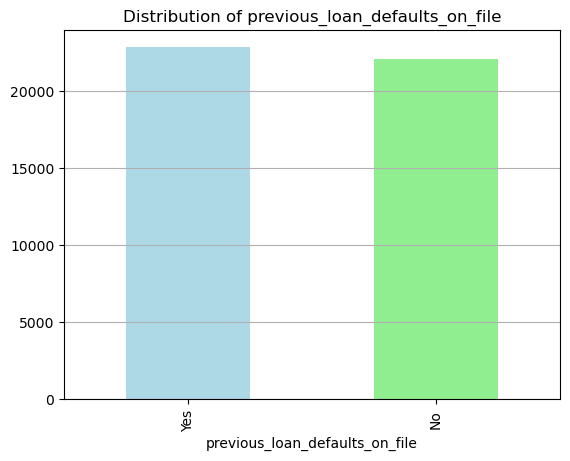

In [23]:
# Univariate analysis for categorical columns
for column in cat_cols.columns:
    cat_cols[column].value_counts().plot(kind='bar',color=['lightblue','lightgreen','pink'])
    plt.title(f"Distribution of {column}")
    plt.grid(axis='y')
    plt.xticks(rotation=90)
    plt.show()

Bivariate analysis focused on loan status

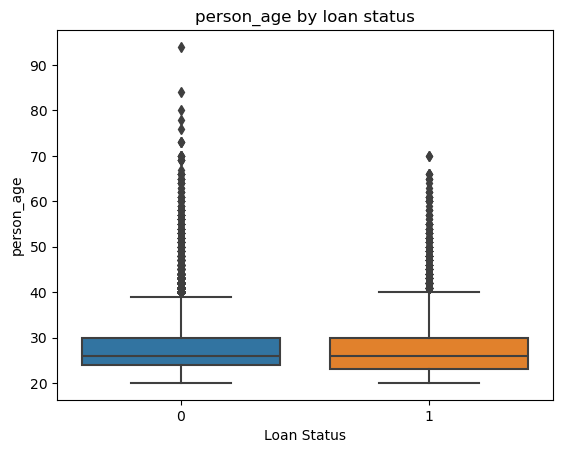

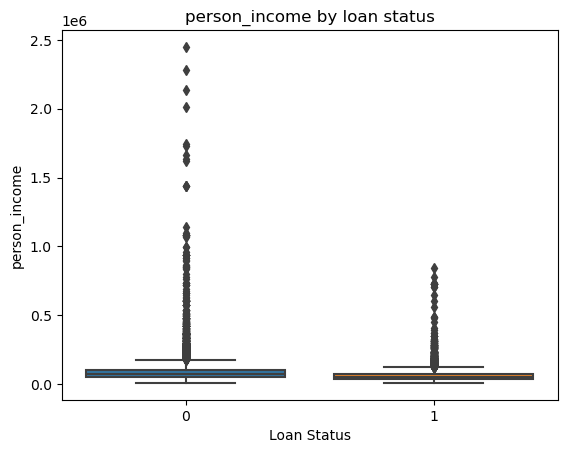

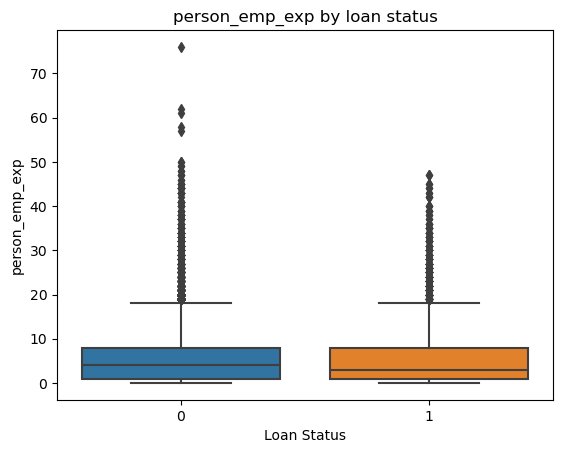

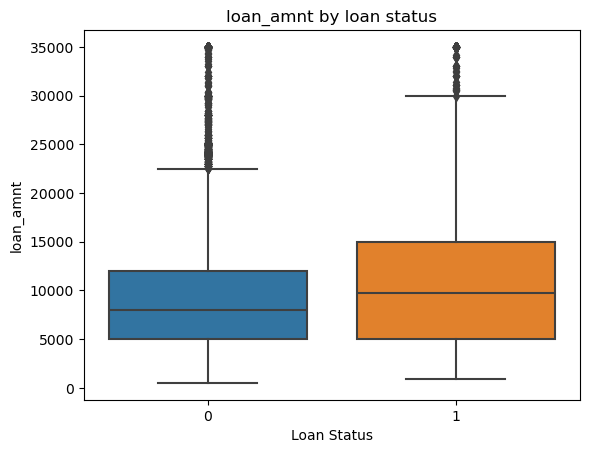

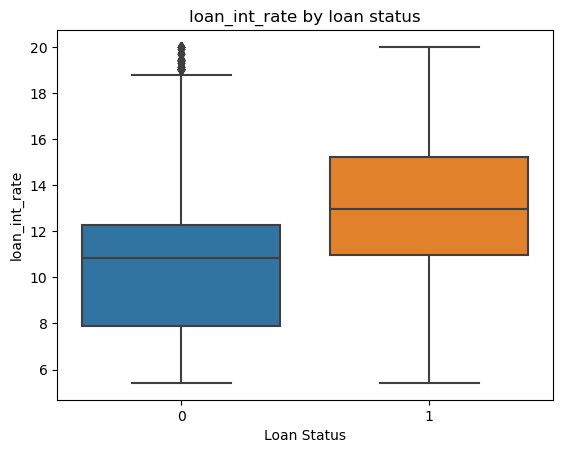

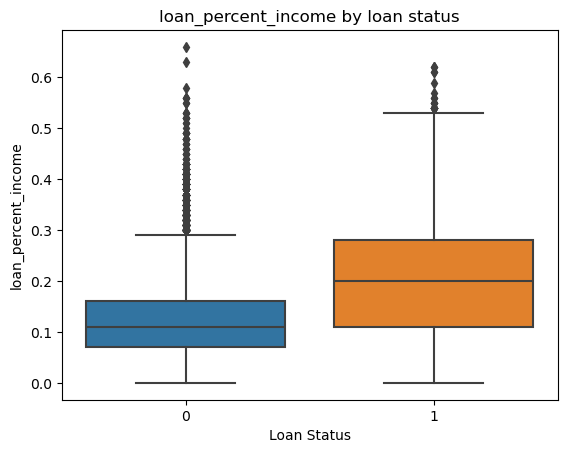

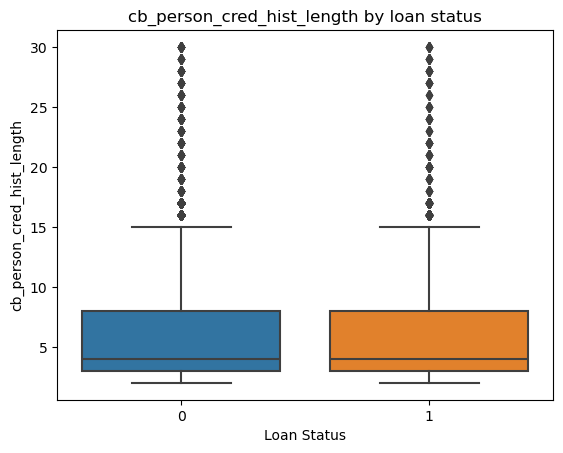

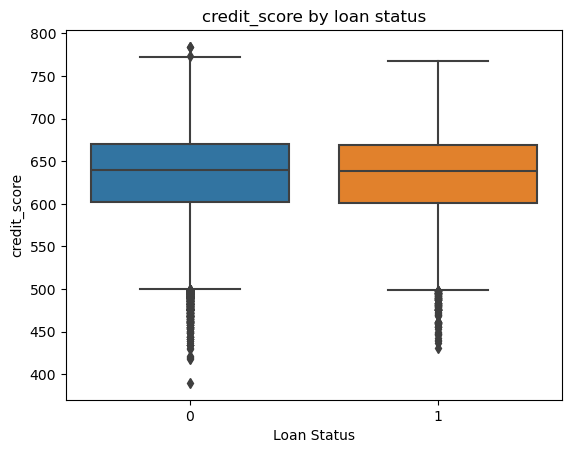

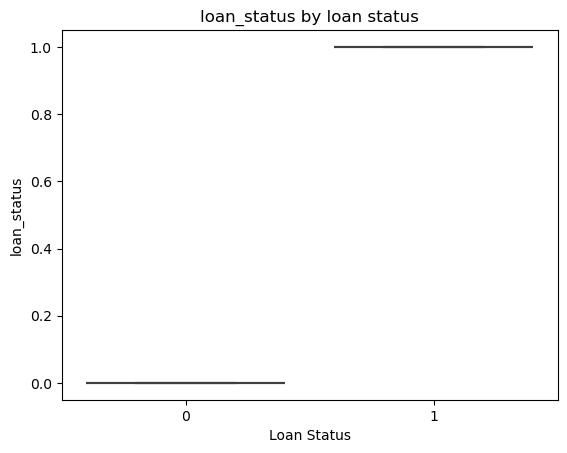

In [25]:
#Boxplot Comparisons
for column in num_cols.columns:
    sns.boxplot(x='loan_status', y=num_cols[column], data=num_cols)
    plt.title(f"{column} by loan status")
    plt.xlabel('Loan Status')
    plt.show()

In [26]:
# Descriptive statistics
for column in num_cols.columns:
    print({column})
    print(num_cols.groupby('loan_status')[column].describe())

{'person_age'}
               count       mean       std   min   25%   50%   75%   max
loan_status                                                            
0            34993.0  27.813334  5.899809  20.0  24.0  26.0  30.0  94.0
1            10000.0  27.521300  5.939063  20.0  23.0  26.0  30.0  70.0
{'person_income'}
               count          mean           std     min       25%      50%  \
loan_status                                                                   
0            34993.0  85630.263567  66489.803571  9595.0  51474.00  72926.0   
1            10000.0  59886.096900  45338.315604  8000.0  36841.75  50629.0   

                   75%        max  
loan_status                        
0            101982.00  2448661.0  
1             71888.25   845636.0  
{'person_emp_exp'}
               count      mean       std  min  25%  50%  75%   max
loan_status                                                       
0            34993.0  5.456406  5.929772  0.0  1.0  4.0  8.0  76.

Non-defaulters tend to have higher income, more employment experience, smaller loan amounts, lower interest rates, and longer credit histories.
Defaulters generally have larger loan amounts, higher interest rates, higher loan-to-income ratios, and slightly lower credit scores.
Key risk factors for default include larger loans, higher interest rates, and higher loan-to-income ratios, while higher income, longer credit history, and more employment experience are associated with lower default risk.

In [28]:
# Correlation matrix
corr = num_cols.corr()
corr

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
person_age,1.000000,0.144634,0.952294,0.052080,0.012757,-0.041955,0.878659,0.174648,-0.020545
person_income,0.144634,1.000000,0.134666,0.312441,-0.001361,-0.287149,0.128832,0.025462,-0.169034
person_emp_exp,0.952294,0.134666,1.000000,0.045792,0.016055,-0.038434,0.840146,0.182592,-0.019529
loan_amnt,0.052080,0.312441,0.045792,1.000000,0.146160,0.592972,0.043250,0.009126,0.107725
loan_int_rate,0.012757,-0.001361,0.016055,0.146160,1.000000,0.125322,0.017886,0.011339,0.332046
loan_percent_income,-0.041955,-0.287149,-0.038434,0.592972,0.125322,1.000000,-0.031436,-0.011064,0.384873
cb_person_cred_hist_length,0.878659,0.128832,0.840146,0.043250,0.017886,-0.031436,1.000000,0.154713,-0.014733
credit_score,0.174648,0.025462,0.182592,0.009126,0.011339,-0.011064,0.154713,1.000000,-0.007409
loan_status,-0.020545,-0.169034,-0.019529,0.107725,0.332046,0.384873,-0.014733,-0.007409,1.000000


In [29]:
corr['loan_status'].sort_values(ascending=False)

loan_status                   1.000000
loan_percent_income           0.384873
loan_int_rate                 0.332046
loan_amnt                     0.107725
credit_score                 -0.007409
cb_person_cred_hist_length   -0.014733
person_emp_exp               -0.019529
person_age                   -0.020545
person_income                -0.169034
Name: loan_status, dtype: float64

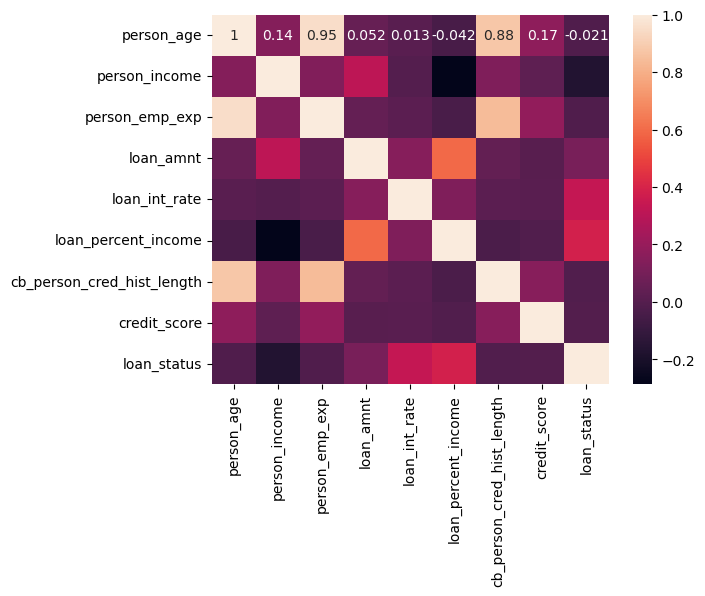

In [30]:
sns.heatmap(corr, annot=True)
plt.show()

# Preprocessing

In [32]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [33]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df:
    df[col] = le.fit_transform(df[col])

In [34]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,2,0,4,17666,0,3,4480,4,1055,49,1,130,0,1
1,1,0,3,69,0,2,10,1,567,8,0,73,1,0
2,5,0,3,75,3,0,1421,3,740,44,1,204,0,1
3,3,0,1,20271,0,3,4480,3,976,44,0,244,0,1
4,4,1,4,15770,1,3,4480,3,880,53,2,155,0,1


# Model Building

In [36]:
# Importing packages for model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [37]:
# Data splitting
y = df['loan_status']
X = df.drop('loan_status', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=5826)

In [38]:
# Scaling the data using standard scaler
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [39]:
# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [40]:
# model accuracy
acc = accuracy_score(y_test, y_pred)
print('Model accuracy is: ' '%.4f' % acc)
prec = precision_score(y_test, y_pred)
print('Model precision is: ' '%.4f' % prec)
recall = recall_score(y_test, y_pred)
print('Model recall is: ' '%.4f' % recall)
f1 = f1_score(y_test, y_pred)
print('Model F1 score is: ' '%.4f' % f1)

Model accuracy is: 0.9271
Model precision is: 0.8853
Model recall is: 0.7761
Model F1 score is: 0.8271


### To know the types of errors made by this algorithm, we produce a confusion matrix.

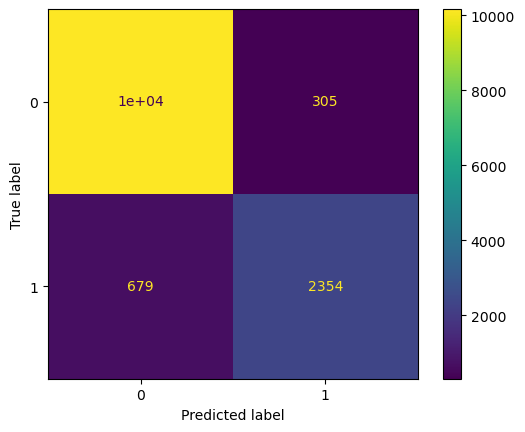

In [42]:
cm = metrics.confusion_matrix(y_test,y_pred,labels = model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = model.classes_)
disp.plot()

The model correctly identified 10,000 cases as 0. However, there were 268 false possitives when they were actually 0. On the other side, the 705 in the bottom-left represent false negatives. Lastly, the 2,328 in the bottom-right are the true positives—the cases the model correctly identified as 1. The false negatives are a high, which is why recall isn’t perfect.

### Lowering the classification threshold to reduce false negatives;

In [45]:
threshold = 0.4 
y_probs = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1
y_pred = (y_probs >= threshold).astype(int)

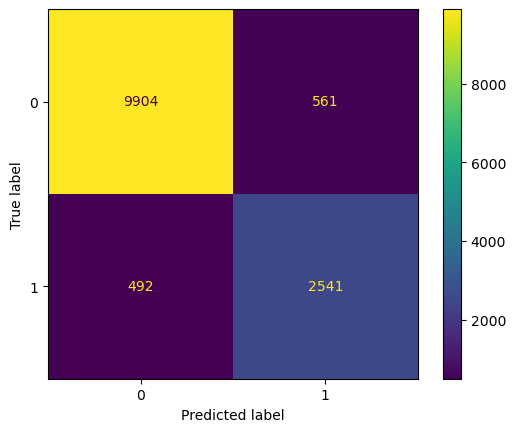

In [46]:
cm = metrics.confusion_matrix(y_test,y_pred,labels = model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = model.classes_)
disp.plot()

In [47]:
acc = accuracy_score(y_test, y_pred)
print('Model accuracy is: ' '%.4f' % acc)
prec = precision_score(y_test, y_pred)
print('Model precision is: ' '%.4f' % prec)
recall = recall_score(y_test, y_pred)
print('Model recall is: ' '%.4f' % recall)
f1 = f1_score(y_test, y_pred)
print('Model F1 score is: ' '%.4f' % f1)

Model accuracy is: 0.9220
Model precision is: 0.8191
Model recall is: 0.8378
Model F1 score is: 0.8284


# Conclusion

The model predicts loan defaults with an accuracy of 92.32%. Its precision of 83.24% means that when it flags a loan as likely to default, it’s usually right, helping reduce unnecessary concerns. At the same time, a recall of 82.39% shows that it’s catching most actual defaulters, making it a useful tool for risk management. With an F1 score of 82.82%, there’s a good balance between being cautious and being accurate. Overall, the model is well-tuned and effective, though there’s always room for improvement—adjusting the classification threshold or refining the features could help make it even better.